In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [3]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.50.post1', '1.0.1.post2')

In [4]:
torch.cuda.set_device(0)

In [8]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-urdu/language-model')

In [9]:
class UrduTokenizer(BaseTokenizer):
    def __init__(self, lang:str):
        self.lang = lang
        self.sp = spm.SentencePieceProcessor()
        self.sp.Load(str(path/"../tokenizer/urdu_lm.model"))
        
    def tokenizer(self, t:str) -> List[str]:
        return self.sp.EncodeAsPieces(t)

In [11]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/urdu_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(30000)]

In [12]:
urdu_vocab = Vocab(itos)

In [13]:
tokenizer = Tokenizer(tok_func=UrduTokenizer, lang='ur')

In [14]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [9]:
data_lm = TextLMDataBunch.from_folder(path=path/'UrduDataset', tokenizer=tokenizer, vocab=urdu_vocab)

In [10]:
data_lm.save()

In [4]:
data_lm = TextLMDataBunch.load(path=path/'UrduDataset')

In [5]:
data_lm.show_batch()

idx,text
0,"▁ xx bo s ▁رینڈولف ▁کاؤنٹی ، ▁الاباما ▁ریاستہائے ▁متحدہ ▁امریکا ▁کا ▁ایک ▁رہائشی ▁علاقہ ▁جو ▁الاباما ▁میں ▁واقع ▁ہے۔ ▁رینڈولف ▁کاؤنٹی ، ▁الاباما ▁کا ▁رقبہ ▁1 ,512 .56 ▁مربع ▁کیلومیٹر ▁ہے ، ▁ہے۔ ▁کی ▁مجموع ی ▁آبادی ▁ xx bo s ▁ xx bo s ▁ریاستہائے ▁متحدہ ▁امریکا ▁کی ▁ریاست ▁نیویارک ▁کی ▁ایک ▁کاؤنٹی - ▁ xx bo s ▁حب ق وق ▁انبیائے ▁بنی ▁اسرائیل ▁میں ▁سے ▁ایک ▁نبی"
1,▁بنجر ▁زمینوں ▁پر ▁نمو ▁پاتا ▁ہے۔ ▁اس ▁کا ▁ تنا ▁بوتل ▁نما ▁ہوتا ▁ہے ▁جس ▁میں ▁بڑی ▁مقدار ▁میں ▁پانی ▁جمع ▁رہتا ▁ہے۔ ▁ایک ▁اندازے ▁کے ▁مطابق ▁اس ▁درخت ▁کے ▁ تنے ▁میں ▁ایک ▁لاکھ ▁بیس ▁ہزار ▁لیٹر ▁پانی ▁جمع ▁کرنے ▁کی ▁گنجائش ▁ہوتی ▁ہے ، ▁جو ▁اس ▁بنجر ▁علاقے ▁میں ▁انسانوں ▁اور ▁جنگلی ▁حیات ▁کے ▁لیے ▁زندگی ▁کی ▁علامت ▁سمجھا ▁جاتا ▁ہے۔ ▁اس ▁درخت ▁کی ▁ایک ▁اور ▁بات ▁جو
2,▁مضمون ▁ملاحظ ہ ▁ہو : ▁م َّ ا ▁خ َ ل ْ ق ُ ك ُ م ْ ▁و َ ل َ ا ▁ب َ ع ْ ث ُ ك ُ م ْ ▁إ ِ ل َّ ا ▁ك َ ن َ ف ْ س ٍ ▁و َ اح ِ د َ ة ٍ ▁۔۔۔ تم ▁سارے ▁انسانوں ▁کو پیدا ▁کرنا اور ▁پھر ▁دوبارہ ▁زندگی ▁بخش نا ▁تو ▁بس ▁ایسا
3,▁اس ▁کے ▁بعد ▁ایک ▁ہزار ▁سات ▁سو ▁تریانوے ▁یا ▁سترہ ▁سو ▁تریانوے ▁بولا ▁جاتا ▁ہے۔ ▁ xx bo s ▁محافظہ ▁قل قی لیہ ▁فلسطین ▁کے ▁سولہ ▁محافظ ات ▁میں ▁سے ▁ایک ▁ہے ، ▁جو ▁مغربی ▁کنارہ ▁میں ▁واقع ▁ہے۔ ▁ xx bo s ▁مملکت ▁ھو ل ندا ▁ایک ▁خود ▁مختار ▁ریاست ▁اور ▁آئینی ▁بادشاہت ▁ہے ▁کو ▁کہ ▁مغربی ▁یورپ ▁کے ▁ساتھ ▁کیریبین ▁میں ▁پھیلی ▁ہوئی ▁ہے۔ ▁مملکت ▁نیدرلینڈز ▁اس ▁وقت
4,▁متن ▁· ▁انگریزی ▁ترجمہ ▁قرآن ▁مجید ▁کی ▁41 ▁ویں ▁سورت ▁جو ▁سو رۂ ▁ف ُ ص ّ ِ ل َ ت ▁بھی ▁کہلاتی ▁ہے۔ ▁اس ▁میں ▁54 ▁آیات ▁اور ▁6 ▁رکوع ▁ہیں۔ ▁اس ▁سورت ▁کا ▁نام ▁دو ▁لفظ وں ▁سے ▁مرکب ▁ہے ▁ایک ▁ح ٰ م ▁دوسرے ▁السجد ہ ▁مطلب ▁یہ ▁ہے ▁کہ ▁وہ ▁سورت ▁جس ▁کا ▁آغاز ▁ح ٰ م ▁سے ▁ہوتا ▁ہے ▁اور ▁جس ▁میں ▁ایک ▁مقام ▁پر


In [6]:
len(data_lm.vocab.itos)

30000

In [7]:
learn = language_model_learner(data_lm, drop_mult=0.3)

In [8]:
gc.collect()

0

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


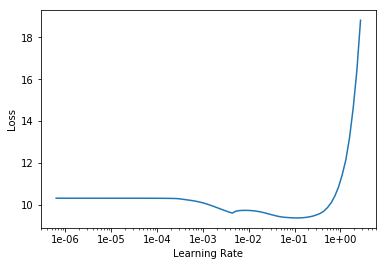

In [15]:
learn.lr_find()
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.851694,3.756488,0.363578


In [17]:
learn.save('first', with_opt=True)

In [18]:
learn.load('first', with_opt=True);

In [9]:
learn.unfreeze()

In [20]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.756290,3.822223,0.353836
2,3.685229,3.799644,0.352893
3,3.589541,3.521406,0.385709
4,3.166971,3.220029,0.428290
5,3.149071,3.101883,0.447893


In [21]:
learn.save('second-ur-lm', with_opt=True)

In [10]:
learn.load('second-ur-lm', with_opt=True);

In [11]:
learn.fit_one_cycle(30, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.928500,3.092237,0.449652
2,3.040899,3.080851,0.451736
3,2.966673,3.068852,0.454310
4,3.010943,3.046978,0.458104
5,2.881997,3.021647,0.462656
6,2.825207,2.996819,0.467186
7,2.938460,2.970946,0.471994
8,2.938644,2.940169,0.477906
9,2.873854,2.917158,0.482316
10,2.932488,2.889037,0.487278


In [12]:
learn.save('third-ur-lm', with_opt=True)

In [13]:
learn.load('third-ur-lm', with_opt=True);

In [14]:
learn.fit_one_cycle(10, 1e-4, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.373808,2.593668,0.544237
2,2.236325,2.592030,0.544580
3,2.412799,2.592942,0.544528
4,2.393425,2.588914,0.545238
5,2.239298,2.586825,0.545738
6,2.450857,2.584988,0.546140
7,2.385140,2.583483,0.546425
8,2.526998,2.581815,0.546879
9,2.255459,2.580998,0.547135
10,2.494641,2.580521,0.547101


In [15]:
learn.save('fourth-ur-lm', with_opt=True)

In [9]:
learn.load('fourth-ur-lm',with_opt=True);

In [14]:
TEXT = "میں کروں گا"
N_WORDS = 40
N_SENTENCES = 2

In [15]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.9) for _ in range(N_SENTENCES)))

میں کروں گا ؤ ی ▁اور ھا ▁ ے ▁ ، ▁ہم اح ▁ ، ▁ ی ه ▁ ہ ي ▁ي ▁چنے ▁ش َّ و ِ ی ▁ ، ▁ث ِ ی نو ▁ ، ▁اب و َ ▁ ، ▁اش َّ
میں کروں گا ، ▁ہو ▁ ی ، ▁ ین کا ، ▁ یات سکو ، ▁ ونکس ، ▁ نگ جو نٹ ، ▁ سیکس ، ▁ ▁جک ▁الحشر ج ، ▁ سٹر ه د ▁کرو ، ▁ سٹر نٹ ▁اور ▁”


In [16]:
np.exp(2.58)

13.197138159658358

In [15]:
# Generating embedding vectors for visualization

In [16]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-urdu/language-model')

In [17]:
defaults.device = torch.device('cpu')

In [19]:
learn = load_learner(path / 'UrduDataset/')

In [20]:
encoder = get_model(learn.model)[0]

In [21]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([30000, 400])

In [22]:
embeddings = encoder.state_dict()['encoder.weight']

In [23]:
embeddings = np.array(embeddings)

In [24]:
embeddings[0].shape

(400,)

In [25]:
df = pd.DataFrame(embeddings)

In [26]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,-0.604038,0.928937,0.173983,-0.548158,0.353071,-0.234544,0.084596,0.351957,-0.719141,-0.240196,...,0.432900,0.041265,-0.556278,0.468767,-0.212824,-0.759726,0.796472,0.435989,0.012394,-0.208792
1,-0.121211,0.036493,-0.013152,-0.026623,0.047395,-0.200364,0.030797,0.105860,-0.021727,-0.127239,...,-0.283677,-0.042465,0.020871,-0.049846,0.400187,-0.483217,0.185068,0.024078,-0.037641,-0.344190
2,-0.129012,0.036570,-0.011465,-0.032070,0.049414,-0.200489,0.022158,0.119801,-0.018700,-0.131696,...,-0.262108,-0.043416,0.021815,-0.045117,0.396356,-0.487899,0.180380,0.027468,-0.038509,-0.342136
3,0.016062,0.460909,0.098035,-0.366861,-0.910681,-0.354914,-0.189845,-1.060809,-0.370609,-0.169891,...,0.404151,0.967090,-0.678651,0.198873,0.523056,-0.331038,1.373236,0.044200,-0.000229,-0.459117
4,-0.000527,-2.012402,0.228611,-0.206076,0.223483,0.864121,-0.145455,1.428005,-0.684859,-0.263586,...,-0.251318,-0.448353,-2.858542,-0.160754,0.260375,0.105250,-0.931670,0.094028,0.053914,0.300583


In [27]:
df.shape

(30000, 400)

In [28]:
df.to_csv('embeddings.tsv', sep='\t', index=False, header=False)

In [29]:
df2 = pd.DataFrame(itos)

In [30]:
df2.head()

,0
0,<unk>
1,<s>
2,</s>
3,▁
4,▁کے


In [31]:
df2.shape

(30000, 1)

In [32]:
df2.to_csv('embeddings_metadata.tsv', sep='\t', index=False, header=False)

In [33]:
encoder.state_dict()['encoder.weight'][1]

tensor([-1.2121e-01,  3.6493e-02, -1.3152e-02, -2.6623e-02,  4.7395e-02,
        -2.0036e-01,  3.0797e-02,  1.0586e-01, -2.1727e-02, -1.2724e-01,
        -1.5761e-02,  1.5594e-01, -1.2256e-01,  2.2788e-01,  5.4618e-02,
         3.5848e-01, -2.1091e-02,  1.9302e-01, -1.4841e-01, -7.1024e-02,
         7.2230e-02,  1.9907e-01, -5.7172e-02,  6.3306e-02,  3.4105e-02,
         3.4476e-02, -4.1414e-02,  5.7155e-02, -1.4124e-01,  5.4504e-02,
        -3.0947e-02,  6.1541e-02, -1.3017e-01,  1.7188e-01,  4.8557e-02,
         3.7693e-02, -2.5805e-01, -5.9561e-02, -1.1908e-02,  2.9839e-01,
         1.5530e-01,  1.2869e-02, -1.4995e-01, -4.4927e-02,  2.9349e-02,
         3.0220e-02,  1.4753e-01,  1.1736e-01, -1.0810e-01, -2.8003e-03,
         3.7500e-03,  3.4439e-01, -5.6529e-02,  1.2767e-01, -1.7533e-01,
         1.5409e-01, -9.5927e-03, -7.1830e-02, -1.3555e-01,  3.8522e-02,
         4.2367e-01, -8.4817e-03, -5.8666e-03,  5.8866e-02, -4.8150e-02,
        -1.2494e-01, -2.5017e-01, -1.8804e-01, -2.0